In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
from scipy import stats

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [2]:
# считывание файла
df1 = pd.read_csv('ex1.csv') 
df1.head()

,x,y
0,40.221367,28.074933
1,41.383916,105.179581
2,50.157355,162.764514
3,20.647573,-51.647274
4,50.657121,126.580772


In [3]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Text(0.5, 0, 'y')

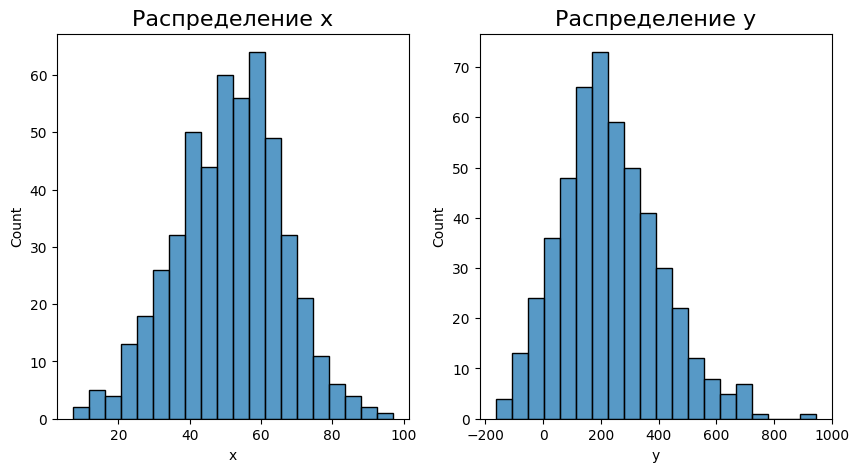

In [4]:
# построение гистограмм распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
histplot1 = sns.histplot(
    data=df1,
    x='x',
    bins=20,
    ax=axes[0]
)
histplot1.set_title('Распределение x', fontsize=16)
histplot1.set_xlabel('x')

histplot2 = sns.histplot(
    data=df1,
    x='y',
    bins=20,
    ax=axes[1]
)
histplot2.set_title('Распределение y', fontsize=16)
histplot2.set_xlabel('y')

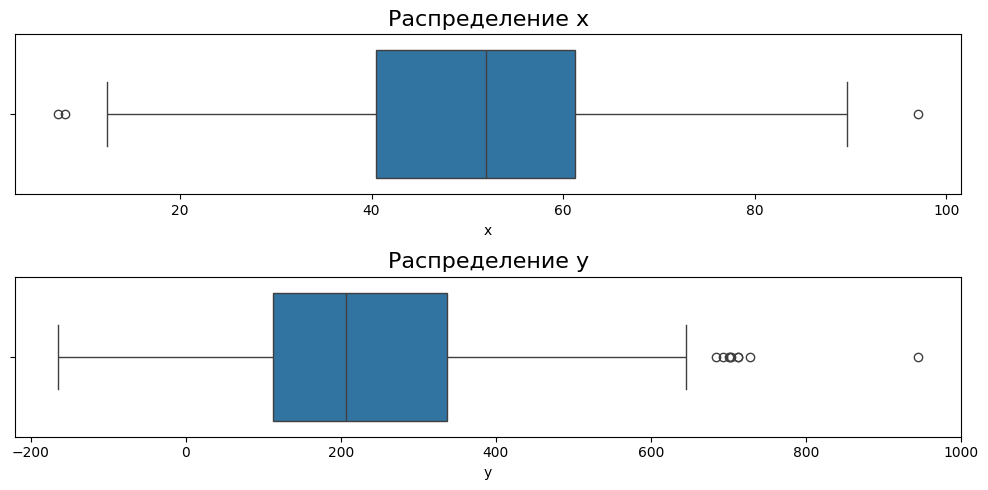

In [5]:
# построение "ящика с усами" для изучения выбросов
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

box1 = sns.boxplot(x='x', data=df1, ax=axes[0])
box1.set_title('Распределение x', fontsize=16)

box2 = sns.boxplot(x='y', data=df1, ax=axes[1])
box2.set_title('Распределение y', fontsize=16)
plt.tight_layout()

plt.show()

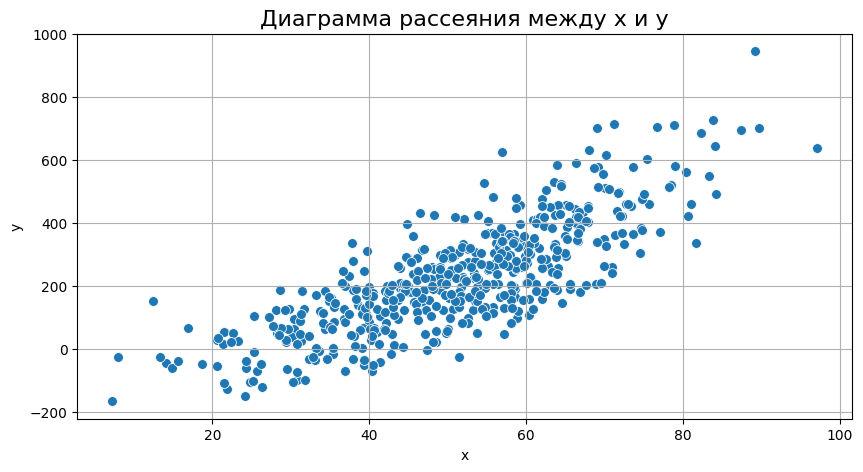

In [6]:
# построение диаграммы рассеяния
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=df1,
    x='x',
    y='y',
    s=50
)
scatterplot.set_title('Диаграмма рассеяния между x и y', fontsize=16)
plt.grid()
plt.show()

In [7]:
# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков

На основании гистограмм, "ящиков с усами" и диаграммы рассеяния можно сделать вывод, что переменные `x` и `y` имеют линейную взаимосвязь, их распределение близко к нормальному, а выбросы, хотя и присутствуют, не выбиваются из общей линейной зависимости и не оказывают значительного влияния. Таким образом, использование коэффициента корреляции Пирсона для оценки зависимости между переменными является обоснованным и целесообразным.

In [8]:
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона
n = df1.shape[0]
alpha = 0.05
correlation_coefficient, p_value = stats.pearsonr(df1['x'], df1['y'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"p-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.8032321850936793
p-значение: 3.973859056368235e-114


In [9]:
# расчет t-критерия
t_score = correlation_coefficient*(n-2)**0.5 / (1-correlation_coefficient**2)**0.5
print('t-score:', t_score)

# расчет критического значения t
t_critical = stats.t.ppf(1 - alpha/2, df = n-2)
print('Критическая t-оценка:',t_critical)

# принятие решения на основе критического значения t
if np.abs(t_score) > t_critical:
    print("Связь статистически значима (на основе критического значения t).")
else:
    print("Нельзя отклонить нулевую гипотезу (на основе критического значения t).")

# принятие решения на основе p-значения
if p_value < alpha:
    print("Связь статистически значима (на основе p-значения).")
else:
    print("Нельзя отклонить нулевую гипотезу (на основе p-значения).")

t-score: 30.092129139493768
Критическая t-оценка: 1.9647389829672648
Связь статистически значима (на основе критического значения t).
Связь статистически значима (на основе p-значения).


In [10]:
# вывод о степени корреляции величин и статистической значимости их взаимосвязи 


Коэффициент корреляции составил около 0.8, что свидетельствует о выраженной прямой зависимости между переменными. Значение t-статистики значительно превышает критическое, что позволяет считать связь статистически значимой.

Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [11]:
# считывание файла
df2 = pd.read_csv('ex2.csv') 
df2.head()

,x,y
0,0.067821,22.107225
1,0.264152,56.672566
2,0.011382,30.585060
3,0.247558,32.309584
4,0.006018,31.577557


In [12]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Text(0.5, 0, 'y')

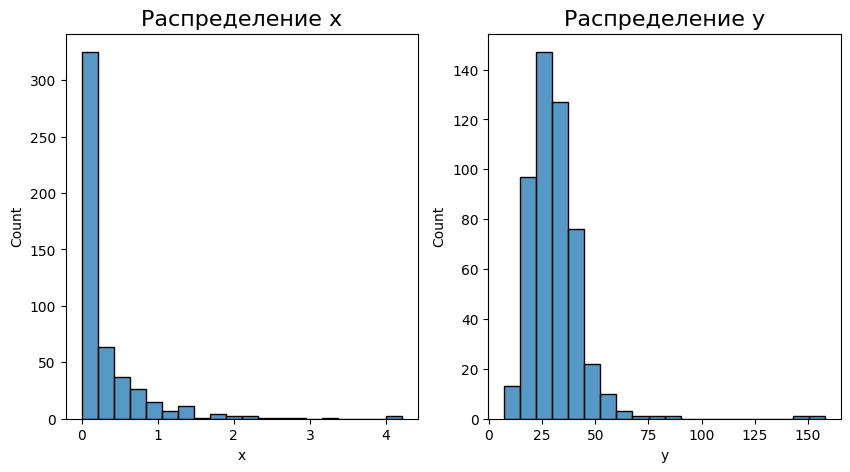

In [13]:
# построение гистограмм распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
histplot1 = sns.histplot(
    data=df2,
    x='x',
    bins=20,
    ax=axes[0]
)
histplot1.set_title('Распределение x', fontsize=16)
histplot1.set_xlabel('x')

histplot2 = sns.histplot(
    data=df2,
    x='y',
    bins=20,
    ax=axes[1]
)
histplot2.set_title('Распределение y', fontsize=16)
histplot2.set_xlabel('y')

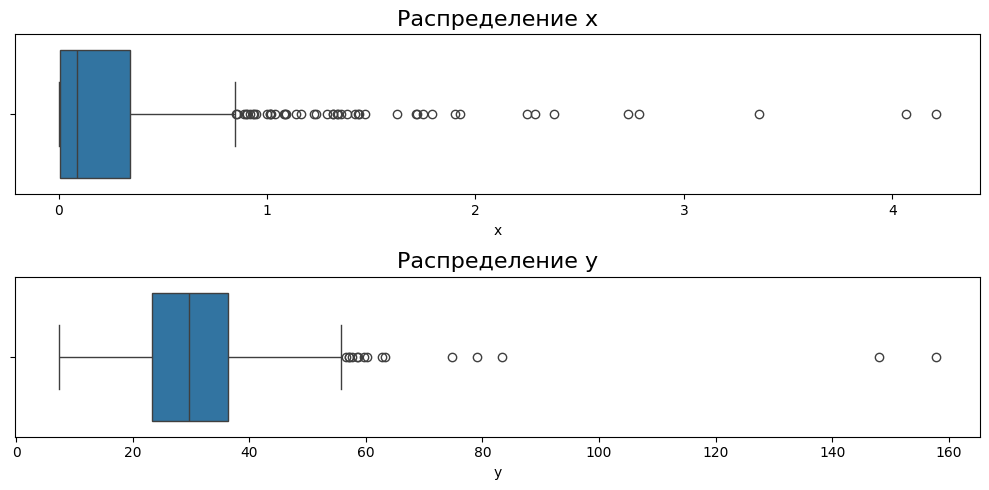

In [14]:
# построение "ящика с усами" для изучения выбросов
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

box1 = sns.boxplot(x='x', data=df2, ax=axes[0])
box1.set_title('Распределение x', fontsize=16)

box2 = sns.boxplot(x='y', data=df2, ax=axes[1])
box2.set_title('Распределение y', fontsize=16)
plt.tight_layout()

plt.show()

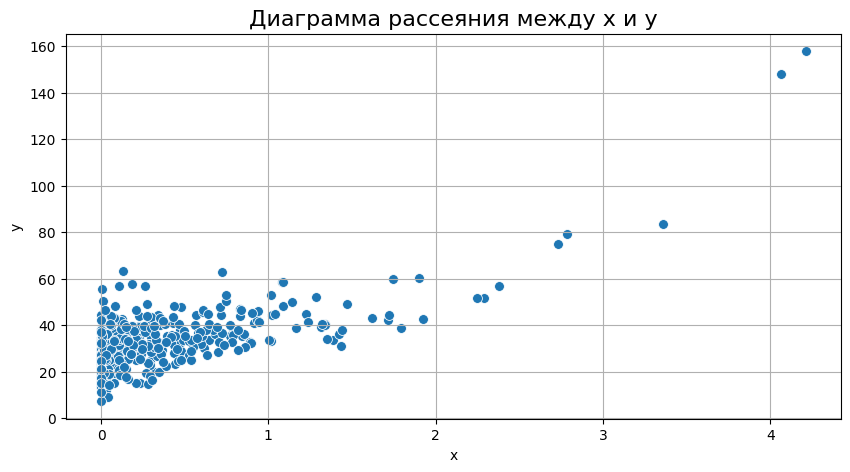

In [15]:
# построение диаграммы рассеяния
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=df2,
    x='x',
    y='y',
    s=50
)
scatterplot.set_title('Диаграмма рассеяния между x и y', fontsize=16)
plt.grid()
plt.show()

In [16]:
# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков

Обе переменные являются числовыми, но имеют ненормальное распределение, содержат значительные выбросы, а их взаимосвязь является нелинейной. В таких условиях для оценки зависимости между ними следует использовать коэффициент корреляции Спирмена.

In [17]:
# КРИТЕРИЙ 4

# расчет коэффициента корреляции Спирмена
n = df2.shape[0]  # Количество наблюдений
alpha = 0.05  # Уровень значимости

# Расчет коэффициента Спирмена и p-value
correlation_coefficient, p_value = stats.spearmanr(df2['x'], df2['y'])
print(f"Коэффициент корреляции Спирмена: {correlation_coefficient}")
print(f"p-значение: {p_value}")

# расчет t-критерия для проверки статистической значимости
t_score = correlation_coefficient * (n - 2) ** 0.5 / (1 - correlation_coefficient ** 2) ** 0.5
print(f"t-статистика: {t_score}")

# Расчет критического значения t для двухстороннего теста
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 2)
print(f"Критическое значение t: {t_critical}")

# Принятие решения на основе критического значения t
if np.abs(t_score) > t_critical:
    print("Связь статистически значима (на основе критического значения t).")
else:
    print("Нельзя отклонить нулевую гипотезу (на основе критического значения t).")

# Принятие решения на основе p-значения
if p_value < alpha:
    print("Связь статистически значима (на основе p-значения).")
else:
    print("Нельзя отклонить нулевую гипотезу (на основе p-значения).")

# Дополнительный вывод о степени корреляции и значимости взаимосвязи
if correlation_coefficient > 0.7:
    print("Корреляция сильная, положительная.")
elif correlation_coefficient > 0.3:
    print("Корреляция умеренная, положительная.")
else:
    print("Корреляция слабая или отсутствует.")

Коэффициент корреляции Спирмена: 0.6170866283465134
p-значение: 8.471901488365329e-54
t-статистика: 17.500235697828852
Критическое значение t: 1.9647389829672648
Связь статистически значима (на основе критического значения t).
Связь статистически значима (на основе p-значения).
Корреляция умеренная, положительная.


In [18]:
# вывод о степени корреляции величин и статистической значимости их взаимосвязи 

Значение коэффициента корреляции около 0.62 свидетельствует о заметной взаимосвязи между переменными. t-критерий подтверждает, что эта связь является статистически значимой.

Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [19]:
# считывание файла
df3 = pd.read_csv('ex3.csv') 
df3.head()

,x,y
0,2.479574,-1.684842
1,-0.630393,7.177759
2,7.976611,-16.409053
3,-4.219019,13.915459
4,-1.681153,10.373936


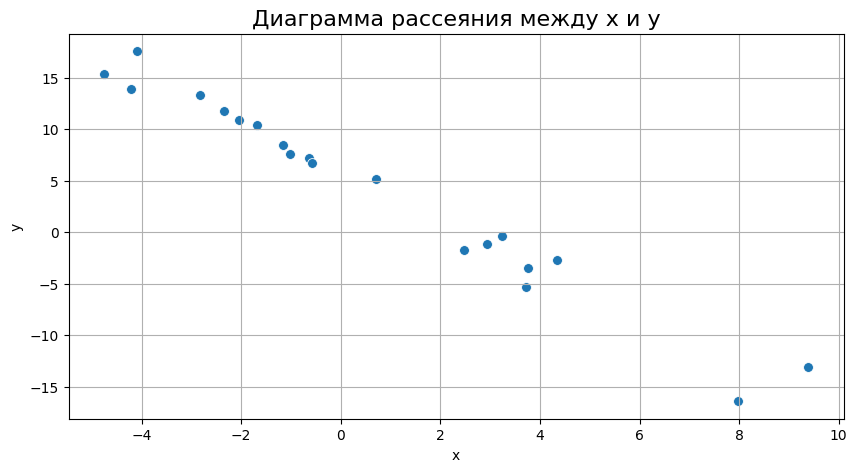

In [20]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=df3,
    x='x',
    y='y',
    s=50
)
scatterplot.set_title('Диаграмма рассеяния между x и y', fontsize=16)
plt.grid()
plt.show()

In [21]:
# вывод о целесообразности использования корреляции Пирсона

На диаграмме рассеяния наблюдается линейная обратная зависимость без критических выбросов. Данные демонстрируют отрицательную линейную регрессию, что делает использование коэффициента Пирсона подходящим для анализа.

In [22]:
# расчет коэффициента Пирсона
n = df3.shape[0]  # количество наблюдений
alpha = 0.05  # уровень значимости

# расчет коэффициента Пирсона
correlation_coefficient, p_value = stats.pearsonr(df3['x'], df3['y'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"p-value: {p_value}")

# расчет t-статистики
t_score = correlation_coefficient * (n - 2)**0.5 / (1 - correlation_coefficient**2)**0.5
print(f't-score: {t_score}')

# расчет критического значения t для двухстороннего теста
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 2)
print(f'Критическое t-значение: {t_critical}')

# принятие решения на основе критического значения t
if np.abs(t_score) > t_critical:
    print("Связь статистически значима (на основе критического значения t).")
else:
    print("Нельзя отклонить нулевую гипотезу (на основе критического значения t).")

# принятие решения на основе p-значения
if p_value < alpha:
    print("Связь статистически значима (на основе p-значения).")
else:
    print("Нельзя отклонить нулевую гипотезу (на основе p-значения).")

Коэффициент корреляции Пирсона: -0.9851417834585036
p-value: 3.1764533567697222e-15
t-score: -24.336374789300795
Критическое t-значение: 2.10092204024096
Связь статистически значима (на основе критического значения t).
Связь статистически значима (на основе p-значения).


In [23]:
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии
import statsmodels.api as sm
res = stats.linregress(df3['x'], df3['y'])
print(f'Коэффициент наклона {res.slope}, сдвиг {res.intercept}')
print(f'Коэффициент корреляции {res.rvalue}, коэффициент детерминации {res.rvalue**2}, p-value (из теста Вальда в предположении, что наклон равен нулю) {res.pvalue}')
print(f'Ошибка наклона {res.stderr}, ошибка сдвига {res.intercept_stderr}')
print(f' Y = {round(res.intercept, 3)} + {round(res.slope, 3)}*X')

Коэффициент наклона -2.3391357411141347, сдвиг 5.740762449346206
Коэффициент корреляции -0.9851417834585033, коэффициент детерминации 0.9705043335158007, p-value (из теста Вальда в предположении, что наклон равен нулю) 3.1764533567699384e-15
Ошибка наклона 0.09611685229891045, ошибка сдвига 0.3755103704947338
 Y = 5.741 + -2.339*X


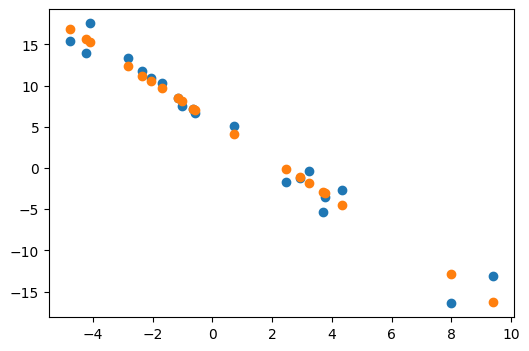

In [24]:
# построение диаграммы рассеяния прогнозных и реальных значений на одном графике
y_pred = res.intercept + res.slope*df3['x']
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df3['x'], df3['y'])
ax.scatter(df3['x'], y_pred)
plt.show()

In [25]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации
approax_err = np.abs((df3['y'] - (res.intercept + res.slope * df3['x']))/df3['y']).mean()
print(f'Средняя ошибка аппроксимации: {approax_err}')


Средняя ошибка аппроксимации: 0.3526380487772689


In [26]:
# КРИТЕРИЙ 8

# расчет F-критерия
F = (res.rvalue**2/(1 - res.rvalue**2))*(n-2)
F_crit = stats.f.ppf(1-alpha, 1, n - 1 - 1)
print(f'Значение F = {F}, критическое значение F = {F_crit}')

# Принятие решения
if F > F_crit:
    print("Связь статистически значима (отклоняем нулевую гипотезу).")
else:
    print("Нельзя отклонить нулевую гипотезу.")

Значение F = 592.2591378853061, критическое значение F = 4.413873419170567
Связь статистически значима (отклоняем нулевую гипотезу).


In [27]:
# вывод о статистической значимости уравнения в целом

На основании F-критерия можно сделать вывод о том, что модель линейной регрессии имеет статистически значимый вклад в объяснение зависимости между переменными.

In [28]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
print(f'Ошибка наклона {res.stderr}, ошибка сдвига {res.intercept_stderr}')

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции
t_coef = abs(stats.t.ppf(alpha/2, n-2))
t_real = F ** 0.5
print(f'Расчетное значение t: {t_real}, критическое значение t: {t_coef}')


Ошибка наклона 0.09611685229891045, ошибка сдвига 0.3755103704947338
Расчетное значение t: 24.336374789300606, критическое значение t: 2.10092204024096


In [29]:
# вывод о статистической значимости коэффициентов регрессии

Так как расчетное значение t-критерия для коэффициентов регрессии и корреляции больше критического, эти коэффициенты статистически значимы.

In [30]:
# запись диапазона коэффицентов регрессии
print(f"slope (95%): {res.slope:.3f} +/- {t_coef*res.stderr:.3f}")
print(f"intercept (95%): {res.intercept:.3f} +/- {t_coef*res.intercept_stderr:.3f}")

slope (95%): -2.339 +/- 0.202
intercept (95%): 5.741 +/- 0.789


In [31]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6
y0 = res.intercept + res.slope*x0
var_o = (y_pred - df3['y'])**2
S0 = (var_o.sum()/(n-1-1))**0.5
delta = S0*(1+1/n+(x0-df3['x'].mean())**2/(n*df3['x'].var()))*t_coef

print(f"Точечное предсказание для x0 = {x0}: y0 = {y0}")
print(f"95% доверительный интервал для y0: ({y0 - delta}, {y0 + delta})")

Точечное предсказание для x0 = 6: y0 = -8.294051997338602
95% доверительный интервал для y0: (-12.262910058301554, -4.32519393637565)


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [32]:
# считывание файла
df4 = pd.read_csv('ex4.csv')
df4.head()

,x1,x2,y
0,13.637973,12.069977,-9.893143
1,-6.443507,23.970769,137.003862
2,9.361274,14.760979,20.571415
3,1.619709,24.043092,93.407384
4,-1.050608,21.837863,95.041511


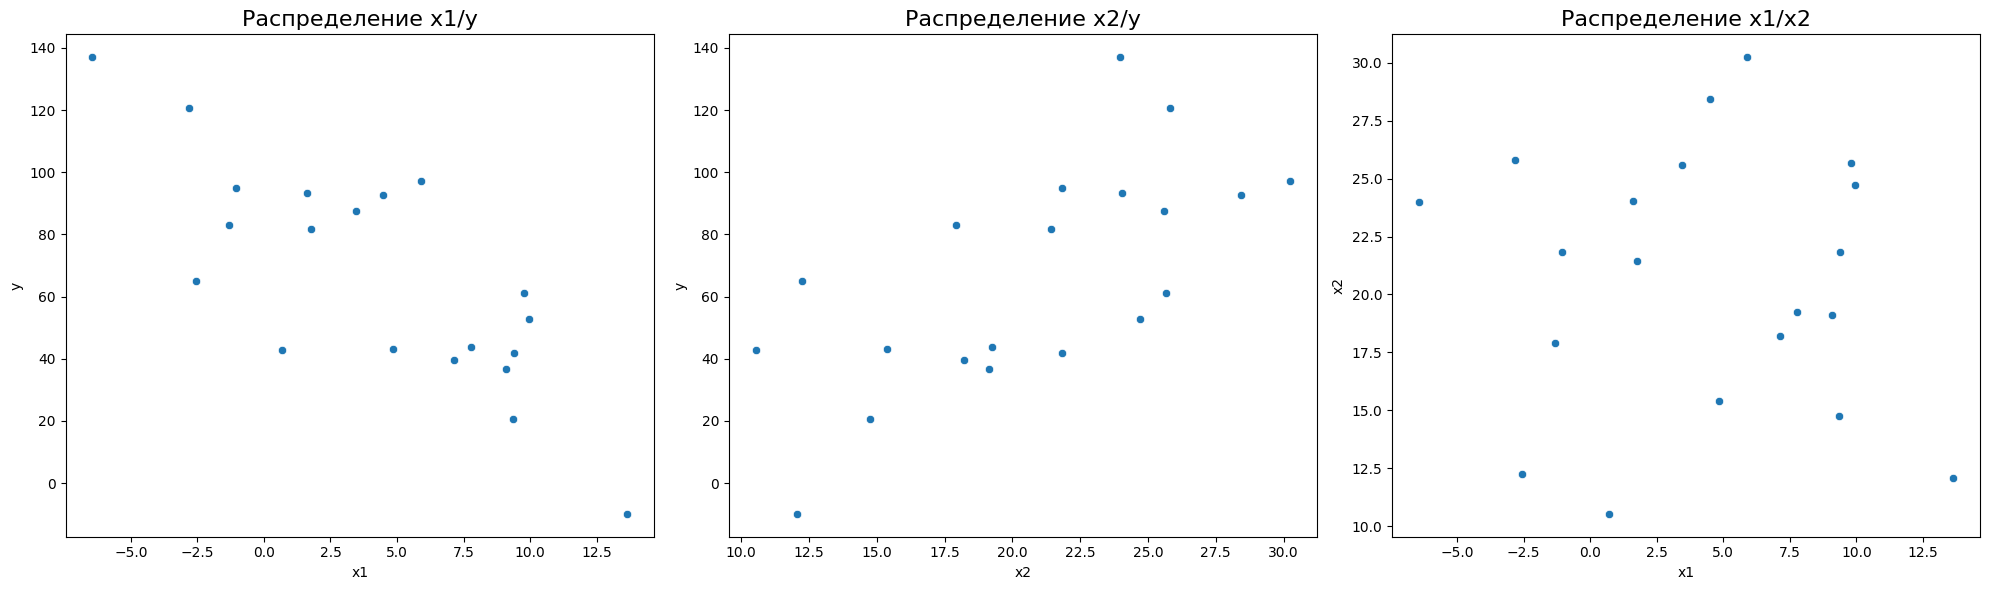

In [33]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

scat1 = sns.scatterplot(x='x1', y='y', data=df4, ax=axes[0])
scat1.set_title('Распределение x1/y', fontsize=16)

scat2 = sns.scatterplot(x='x2', y='y', data=df4, ax=axes[1])
scat2.set_title('Распределение x2/y', fontsize=16)

scat3 = sns.scatterplot(x='x1', y='x2', data=df4, ax=axes[2])
scat3.set_title('Распределение x1/x2', fontsize=16)
plt.tight_layout()
plt.show()


In [34]:
# вывод о корректности использования модели множественной регрессии

* Диаграммы рассеяния (x1,y) показывает наличие обратной зависимости y от х1.
* Диаграммы рассеяния (x2,y) показывает наличие прямой зависимости y от х2.'
* Диаграммы рассеяния (x1,х2) показывает на  слабую зависимость или дажее ее отсутствие х1 и х2.'

In [35]:
# расчет коэффициентов корреляции
# Расчет корреляционной матрицы
corr_matrix = df4.corr()
print("\nКорреляционная матрица:")
print(corr_matrix)

# Анализ мультиколлинеарности
corr_x1_x2 = corr_matrix.loc['x1', 'x2']
print(f"Корреляция между x1 и x2: {corr_x1_x2:.2f}")

corr_x1_y = corr_matrix.loc['x1', 'y']
print(f"Корреляция между x1 и y: {corr_x1_y:.2f}")

corr_x2_y = corr_matrix.loc['x2', 'y']
print(f"Корреляция между x2 и y: {corr_x2_y:.2f}")



Корреляционная матрица:
          x1        x2         y
x1  1.000000 -0.075013 -0.787807
x2 -0.075013  1.000000  0.669834
y  -0.787807  0.669834  1.000000
Корреляция между x1 и x2: -0.08
Корреляция между x1 и y: -0.79
Корреляция между x2 и y: 0.67


In [36]:
# вывод о необходимости устранения какого-либо фактора

* Коэффициент корреляции между переменной y и x1 показывает наличие сильной обратной зависимости между y и x1.
* Коэффициент корреляции между переменной y и x2 свидетельствует о наличии значимой прямой зависимости между y и x2.
* Коэффициент корреляции между x1 и x2 указывает на отсутствие значимой зависимости между этими переменными.
* Оба фактора следует включить в модель, поскольку они влияют на переменную y и не имеют сильной корреляции между собой, что исключает проблемы мультиколлинеарности.

In [37]:
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии
X = df4[['x1', 'x2']]
y = df4['y']

# Стандартизация независимых переменных и зависимой переменной
X_standardized = (X - X.mean()) / X.std()
y_standardized = (y - y.mean()) / y.std()

# Модель с использованием стандартизированных переменных
model = sm.OLS(y_standardized, sm.add_constant(X_standardized)).fit()

# Стандартные коэффициенты регрессии
standardized_coefficients = model.params
print("Стандартные коэффициенты регрессии:")
print(standardized_coefficients)

Стандартные коэффициенты регрессии:
const    5.551115e-17
x1      -7.417346e-01
x2       6.141944e-01
dtype: float64


In [38]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии
b_x1 = model.params.x1 * df4['y'].std() / df4['x1'].std()
b_x2 = model.params.x2 * df4['y'].std() / df4['x2'].std()
a = df4['y'].mean() - b_x1 * df4['x1'].mean() - b_x2 * df4['x2'].mean()

print(f"Свободный член (a): {a:.3f}")
print(f"Коэффициент при x1 (b_x1): {b_x1:.3f}")
print(f"Коэффициент при x2 (b_x2): {b_x2:.3f}")

Свободный член (a): 6.722
Коэффициент при x1 (b_x1): -4.917
Коэффициент при x2 (b_x2): 3.893


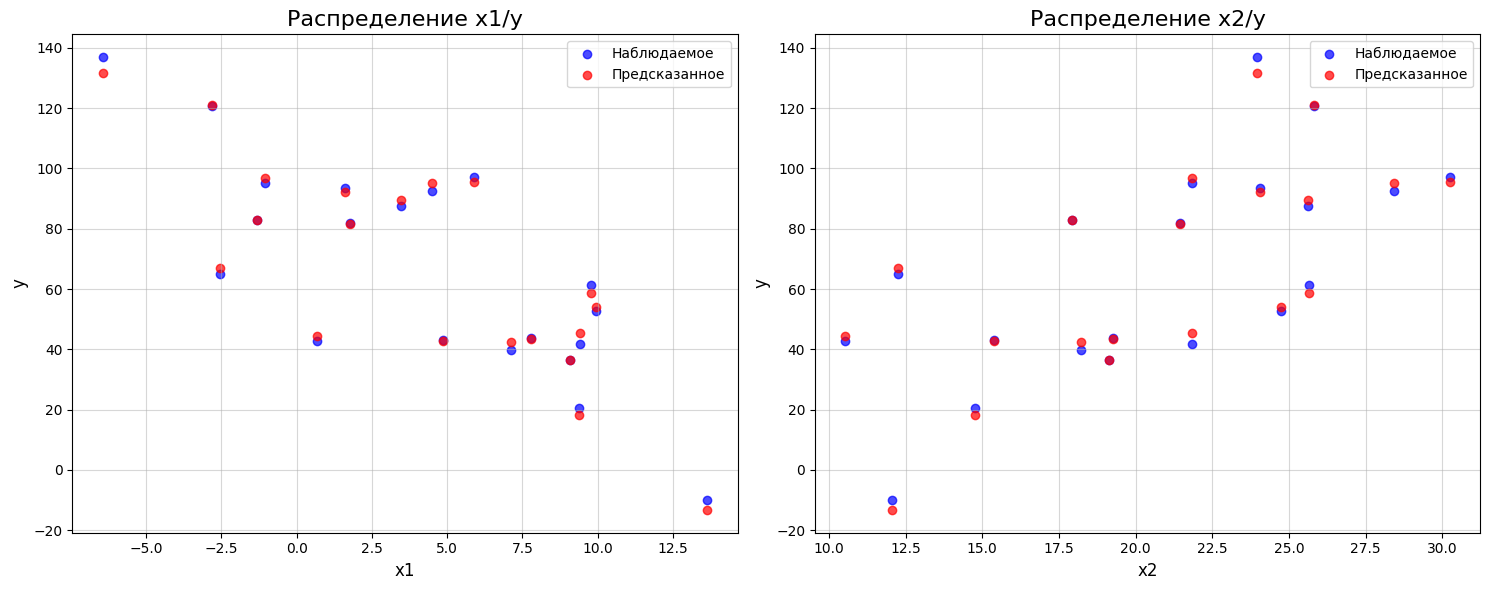

In [39]:
# построение диаграмм рассеяния прогнозных и реальных значений на одном графике
# Вычисление предсказанных значений
df4['y_pred'] = a + b_x1 * df4['x1'] + b_x2 * df4['x2']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# График для x1 и y
axes[0].scatter(df4['x1'], df4['y'], label='Наблюдаемое', color='blue', alpha=0.7)
axes[0].scatter(df4['x1'], df4['y_pred'], label='Предсказанное', color='red', alpha=0.7)
axes[0].set_title('Распределение x1/y', fontsize=16)
axes[0].set_xlabel('x1', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(alpha=0.5)

# График для x2 и y
axes[1].scatter(df4['x2'], df4['y'], label='Наблюдаемое', color='blue', alpha=0.7)
axes[1].scatter(df4['x2'], df4['y_pred'], label='Предсказанное', color='red', alpha=0.7)
axes[1].set_title('Распределение x2/y', fontsize=16)
axes[1].set_xlabel('x2', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(alpha=0.5)

plt.tight_layout()
plt.show()


In [40]:
# КРИТЕРИЙ 14

# Расчет индекса множественной корреляции
r_x1 = corr_matrix['y']['x1']
r_x2 = corr_matrix['y']['x2']

# Использование коэффициентов регрессии из модели
R = model.params['x1'] * r_x1 + model.params['x2'] * r_x2

# Вывод результата
print(f'Индекс множественной корреляции (R): {R}')

Индекс множественной корреляции (R): 0.995752543861612


In [41]:
# Расчет F-критерия
n = df4.shape[0]
k = 2

# Формула расчета F-критерия
F = (R**2 / (1 - R**2)) * ((n - k - 1) / k)

# Критическое значение F-критерия
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, dfn=k, dfd=n - k - 1)

# Вывод результатов
print(f'Рассчитанное значение F: {F:.3f}')
print(f'Критическое значение F: {F_crit:.3f}')

# Сравнение F-критерия и вывод о значимости модели
if F > F_crit:
    print("Модель статистически значима.")
else:
    print("Модель не является статистически значимой.")


Рассчитанное значение F: 994.228
Критическое значение F: 3.592
Модель статистически значима.


In [42]:
# вывод о статистической значимости уравнения в целом

Так как рассчитанное значение F-критерия значительно превышает критическое, уравнение регрессии можно считать статистически значимым.

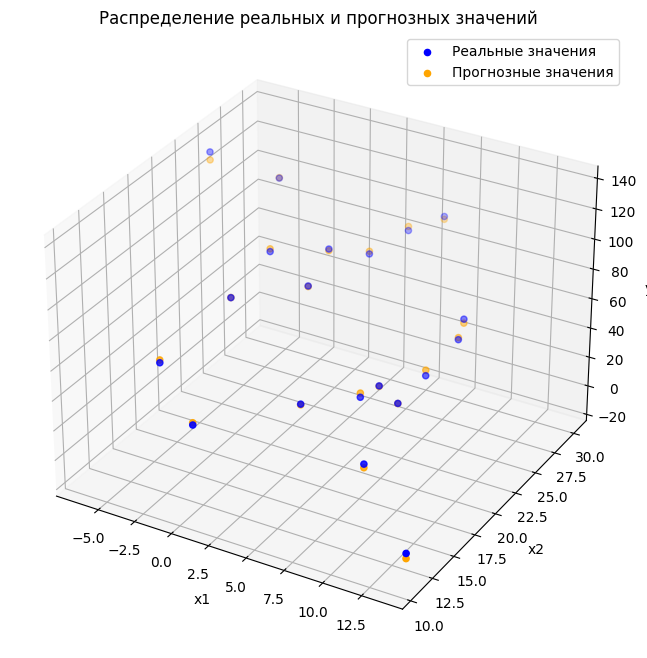

In [43]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Реальные значения
ax.scatter(df4['x1'], df4['x2'], df4['y'], color='blue', label='Реальные значения')

# Прогнозные значения
ax.scatter(df4['x1'], df4['x2'], df4['y_pred'], color='orange', label='Прогнозные значения')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Распределение реальных и прогнозных значений')
ax.legend()
plt.show()